In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
IMAGE_SIZE = 75

In [ ]:
file1 = "Cat_Dog_Train_Data_1.npy"
file2 = "Cat_Dog_Train_Data_2.npy"
file3 = "Cat_Dog_Train_Data_3.npy"
file4 = "Cat_Dog_Test_Data.npy"
file5 = "Cat_Dog_Train_Data_4.npy"
#path = f"/content/gdrive/My Drive/models/dogs-vs-cats/{file_name}"

In [ ]:
train_data_1 = np.load(f"/content/gdrive/My Drive/models/dogs-vs-cats/{file1}", allow_pickle=True)
train_data_2 = np.load(f"/content/gdrive/My Drive/models/dogs-vs-cats/{file2}", allow_pickle=True)
train_data_3 = np.load(f"/content/gdrive/My Drive/models/dogs-vs-cats/{file3}", allow_pickle=True)
test_data = np.load(f"/content/gdrive/My Drive/models/dogs-vs-cats/{file4}", allow_pickle=True)
test_data_1 = np.load(f"/content/gdrive/My Drive/models/dogs-vs-cats/{file5}", allow_pickle=True)

In [ ]:
train_data = np.concatenate((train_data_1, train_data_2, train_data_3))
train_data.shape

(5000, 2)

In [ ]:
test_data.shape

(500, 2)

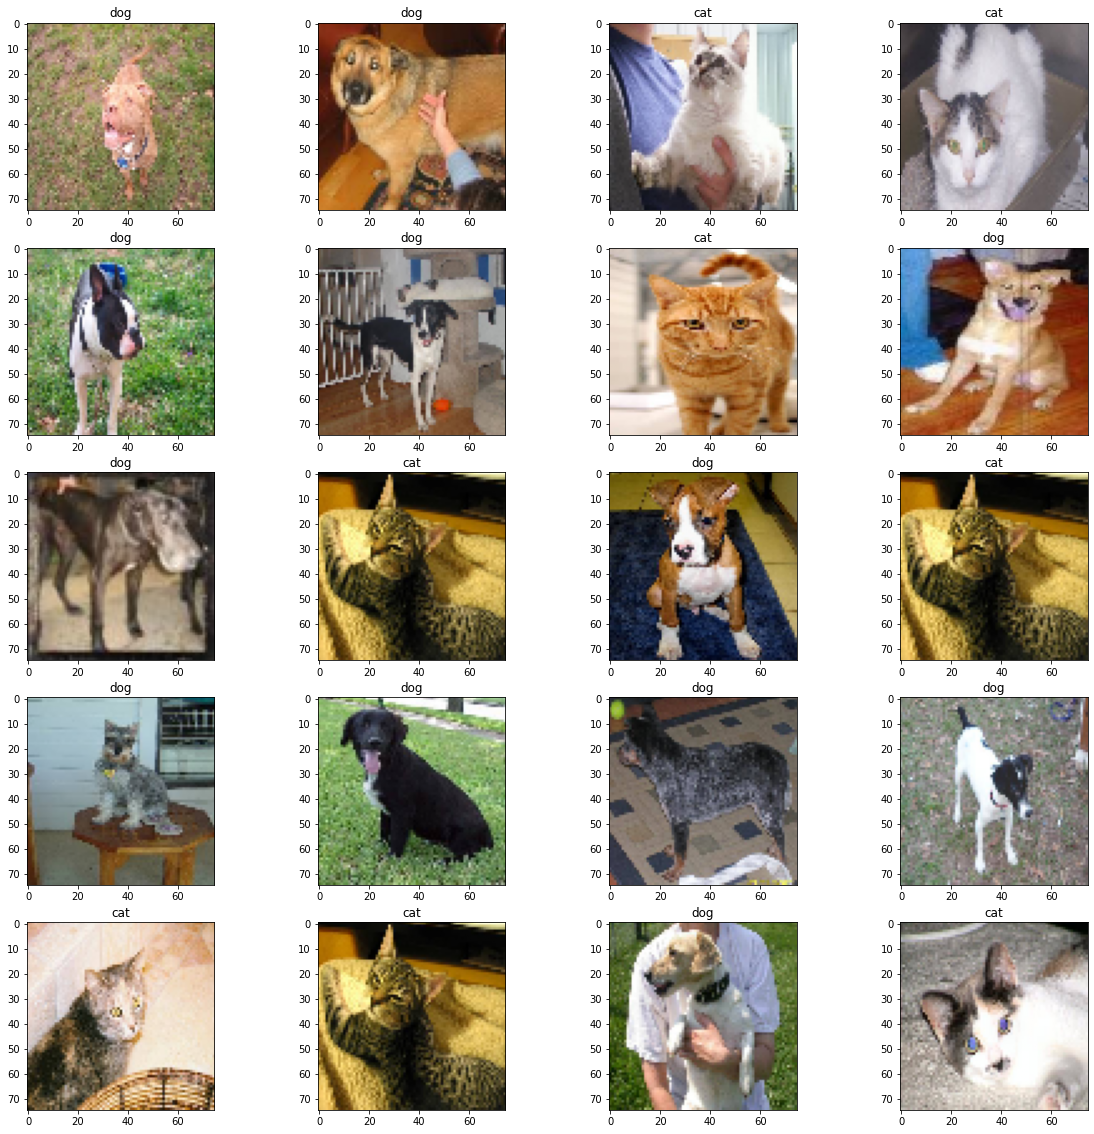

In [ ]:
# show some training images with labels
count = 0
num_of_images = 20
plt.figure(figsize=(20,20))
for i in np.random.randint(100, size=num_of_images):
  count = count + 1
  plt.subplot(num_of_images/4, 4, count)
  plt.imshow(train_data[i][0])
  p = train_data[i][1]
  # print(p)
  # break
  if p[0]>p[1]:
    plt.title('cat')
  else:
    plt.title("dog")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization,Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import random
import matplotlib.pyplot as plt


In [ ]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Flatten(),
                    Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 41474     
Total params: 60,866
Trainable params: 60,866
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train = np.array([i[0] for i in train_data])
X_train = X_train.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 3)
y_train = np.array([i[1] for i in train_data])


X_test = np.array([i[0] for i in test_data])
X_test = X_test.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 3)
y_test = np.array([i[1] for i in test_data])

#test_data_1
X_test_1 = np.array([i[0] for i in test_data_1])
X_test_1 = X_test_1.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 3)
y_test_1 = np.array([i[1] for i in test_data_1])

In [ ]:
X_train.shape
y_train[:2]

array([[1, 0],
       [1, 0]], dtype=int32)

In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
79/79 [==============================] - 33s 423ms/step - loss: 0.6892 - accuracy: 0.5384 - val_loss: 0.6807 - val_accuracy: 0.5820
Epoch 2/10
79/79 [==============================] - 33s 422ms/step - loss: 0.6670 - accuracy: 0.6070 - val_loss: 0.6517 - val_accuracy: 0.6360
Epoch 3/10
79/79 [==============================] - 33s 421ms/step - loss: 0.6467 - accuracy: 0.6248 - val_loss: 0.6340 - val_accuracy: 0.6180
Epoch 4/10
79/79 [==============================] - 33s 422ms/step - loss: 0.6238 - accuracy: 0.6644 - val_loss: 0.6153 - val_accuracy: 0.6960
Epoch 5/10
79/79 [==============================] - 34s 425ms/step - loss: 0.5930 - accuracy: 0.6914 - val_loss: 0.5984 - val_accuracy: 0.6320
Epoch 6/10
79/79 [==============================] - 33s 424ms/step - loss: 0.5800 - accuracy: 0.7036 - val_loss: 0.5670 - val_accuracy: 0.7160
Epoch 7/10
79/79 [==============================] - 34s 424ms/step - loss: 0.5667 - accuracy: 0.7092 - val_loss: 0.5623 - val_accuracy: 0.7400

In [ ]:
predictions = model.predict(x=X_test_1, verbose=0)

In [ ]:
import os
path = "/content/gdrive/My Drive/models/cat_vs_dog_classifier_75X75.h5"
if os.path.isfile(path) is False:
  model.save(path)

In [ ]:
np.round(predictions)[:5]
np.argmax(predictions, axis=-1)
np.argmax(y_test_1, axis=-1)

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
cm = confusion_matrix(y_true=np.argmax(y_test_1, axis=-1), y_pred=np.argmax(predictions, axis=-1))

In [ ]:
cm

array([[698, 281],
       [249, 772]])

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  """
  this function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation= 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", 
             color="white" if cm[i, j] >  thresh else "black")
  
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")


In [ ]:
cm

array([[774, 205],
       [333, 688]])

Confusion matrix, without normalization
[[698 281]
 [249 772]]


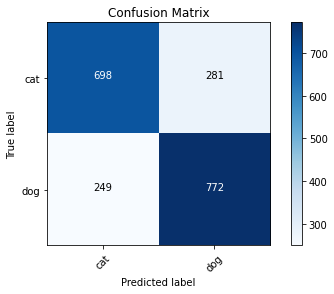

In [ ]:
cm_plot_labels = ["cat", "dog"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

**Build Fine-tuned VGG16 model**

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [ ]:
model.summary()

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
# Train the fine-tuned VGG16 model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y= y_train, batch_size=64, epochs=5, verbose=2, validation_data=(X_test, y_test))

Epoch 1/5


ValueError: ignored